In [4]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt, dates
import random
import numpy as np
from tqdm import tqdm
import scipy.io as spio
import pickle


In [2]:
sum([i for i in range(3,10) if i%4 != 3 and i%3 != 2])

19

In [79]:
with open('../results/performance.pkl', 'rb') as f:
        performance = pickle.load(f)

In [84]:
k = 2
errors_het = performance[f'K={k}']['errors_list']['het'][16]
errors_sync = performance[f'K={k}']['errors_list']['sync'][16]

In [85]:
np.bincount(errors_het)

array([48638,   505,   173,   813,  1193,   578,   814,     6,   809,
        1345,    12,     0,     6])

In [87]:
np.bincount(errors_sync)

array([16973,  9912, 10846,  3766,  3755,  6283,  2456,  3022,   750,
        1567,   401,    37,    38,    26,     4])

In [15]:
x = [1,2,3,4,3,1,2,3,1,2,0,2]
L = 10
max_lag = 2
lag_freq = np.bincount(x, minlength=L)
roll_sum = circ_rolling_sum(lag_freq,max_lag)
window_start = np.argmax(roll_sum)
window_end = window_start + max_lag

In [17]:
lag_freq

array([1, 3, 4, 3, 1, 0, 0, 0, 0, 0])

In [18]:
roll_sum

array([4, 7, 7, 4, 1, 0, 0, 0, 0, 1])

In [45]:
N = 10
x = np.arange(20)
shifts = random.choices(range(5), k=N)
X = np.array([list(np.roll(x, shift=shifts[i]) for i in range(N))])[0].T


In [70]:
L = 8
lag_mat = np.array(random.choices(range(L),k=16)).reshape(4,4)

print(lag_mat)
lag_mat[abs(lag_mat) >= (L+1)//2] -= np.sign(lag_mat[abs(lag_mat) >= (L+1)//2]) * L
print(lag_mat)

[[7 7 3 6]
 [3 7 7 2]
 [4 2 3 4]
 [1 3 7 7]]
[[-1 -1  3 -2]
 [ 3 -1 -1  2]
 [-4  2  3 -4]
 [ 1  3 -1 -1]]


In [72]:
x = np.array([0,0,0,3,0,4,0])
np.nonzero(x)

(array([3, 5]),)

In [81]:
with open('../results/performance.pkl', 'rb') as f:
        performance = pickle.load(f)

In [96]:
k = 2
errors = performance[f'K={k}']['errors_list']['spc-homo']

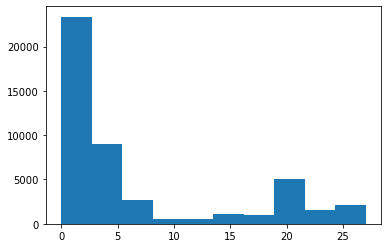

In [101]:
plt.hist(errors[19]);

In [89]:
k = 2
errors = performance[f'K={k}']['errors_list']['het']

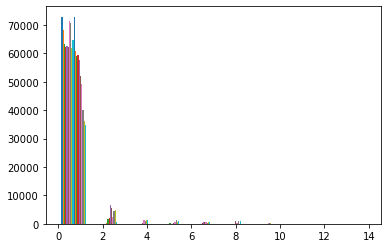

In [90]:
plt.hist(errors);

In [46]:
from scipy import signal
# random.seed(42)
for i in range(10):
    n = random.choice(range(10,20))
    l = random.choice(range(1,n))
    l = n-1
    x = np.random.randn(n)
    y = np.roll(x, shift = 2)
    ccf = signal.correlate(x, y, 'full')
    lag = len(x) - (np.argmax(ccf[n-l-1:n+l])+ n-l-1) - 1
    lag0 = len(x) - np.argmax(ccf) - 1
    assert lag == lag0, print(lag, lag0, n, l)
    assert (np.roll(x,shift = lag) == y).all()

-1 2 11 1


AssertionError: None

In [3]:
OPCL = pd.read_csv('HeterogeneousMRA/OPCL_20000103_20201231.csv', index_col = 0)
OPCL.head()

,X20000103,X20000104,X20000105,X20000106,X20000107,X20000110,X20000111,X20000112,X20000113,X20000114,...,X20201217,X20201218,X20201221,X20201222,X20201223,X20201224,X20201228,X20201229,X20201230,X20201231
ticker,,,,,,,,,,,,,,,,,,,,,
AA,-0.013042,0.010043,0.047628,-0.011713,-0.016118,-0.032073,0.022608,-0.005249,-0.018210,-0.020109,...,-0.004498,-0.009046,0.039673,-0.025584,0.019083,-0.017156,0.006315,-0.004527,0.039099,0.002172
ABM,-0.009188,0.012346,-0.006192,0.000000,0.003091,0.000000,-0.009302,0.003130,-0.028619,0.012423,...,0.045594,-0.020819,-0.010283,-0.005448,-0.016100,-0.011338,0.009932,-0.024098,-0.002646,0.005565
ABT,-0.007117,-0.012786,0.011111,0.032553,0.028573,-0.021053,0.010850,-0.021779,-0.009217,0.000000,...,0.008772,0.001102,0.004915,0.004165,-0.013129,0.008434,-0.010796,-0.001568,-0.002303,0.012129
ADI,-0.036071,-0.044261,0.014493,-0.027719,0.033654,0.048129,-0.031921,0.034686,-0.020443,0.057086,...,0.001601,0.001246,0.006050,0.010801,-0.010972,0.002495,-0.011887,-0.010525,0.010522,0.008361
ADM,0.000000,0.005277,-0.015915,0.010695,0.005249,-0.005222,-0.015831,0.020943,0.000000,0.030459,...,-0.008269,0.007476,0.007115,-0.011021,0.006709,0.000607,-0.002010,-0.008056,0.009259,0.007367


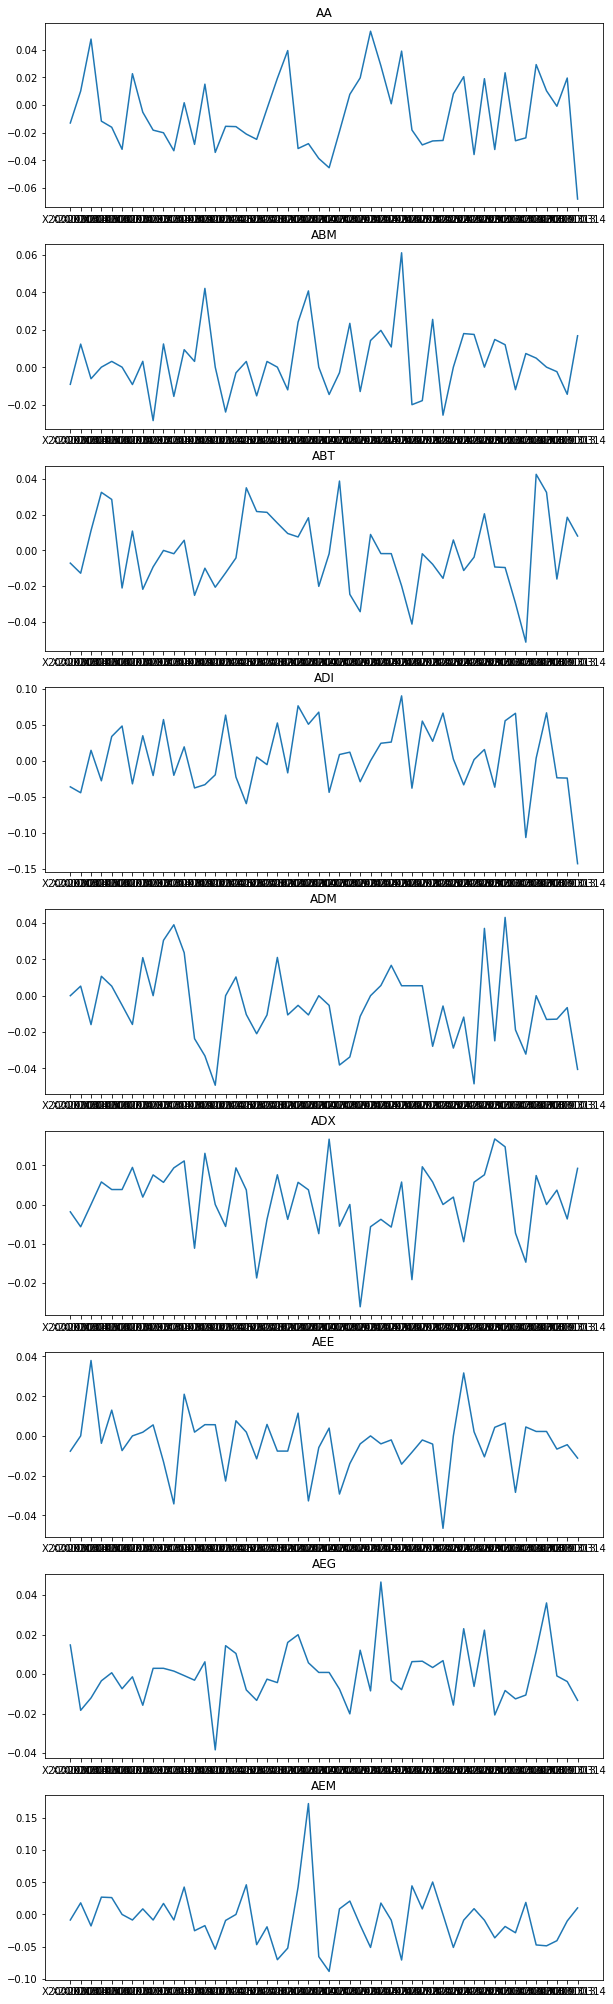

In [15]:
M = 9
L = 50
fig, ax = plt.subplots(M,1, figsize=(10, 4*M))
for m in range(M):
    ax[m].plot(OPCL.iloc[m,:L])
    ax[m].set_title(OPCL.index[m])
#OPCL.iloc[:M,:L].transpose().plot(figsize = (20,8))

In [4]:
ticker = 'AAPL'
demo_date = '2012-06-21'
start_time = '34200000'
end_time = '57600000'
nlevels = '10'

orderbook = '_'.join((ticker, demo_date, start_time, end_time, 'orderbook', nlevels))
message = '_'.join((ticker, demo_date, start_time, end_time, 'message', nlevels))
df_prices = pd.read_csv('data/AAPL/'+orderbook + '.csv', names = ['AskPrice1', 'BidPrice1'], usecols = [0, 2])
df_message = pd.read_csv('data/AAPL/'+message +'.csv', names = ['Time'], usecols = [0])
df_prices['MidPrice'] = df_prices.mean(axis = 1)
df_prices['Time'] = df_message['Time'].copy()
print(ticker, ', number of data points:',len(df_prices))

AAPL , number of data points: 400391


In [5]:
df_prices = df_prices.iloc[:,[3,2,0,1]]

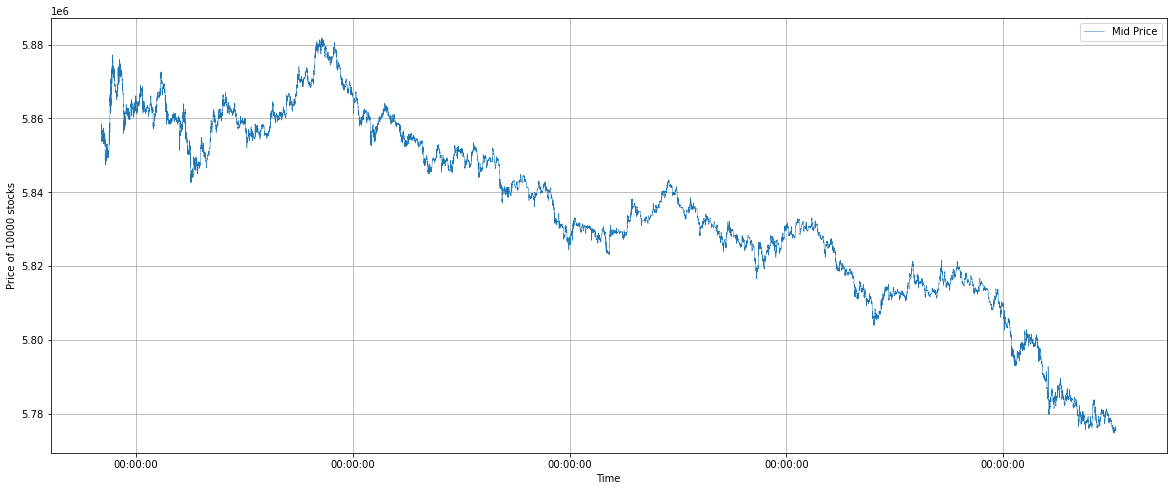

In [6]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df_prices.Time, df_prices.MidPrice, linewidth = 0.5, label = 'Mid Price')
plt.legend()
plt.grid()
# plt.tick_params(rotation=45)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
plt.xlabel('Time')
plt.ylabel('Price of 10000 stocks')
plt.show()

In [7]:
def seconds_to_time(second, date = '2012-06-21'):
    td = str(dt.timedelta(seconds = int(second), microseconds = 1e6 * (second - int(second))))
    time = dt.datetime.strptime("{} {}".format(date, td), "%Y-%m-%d %H:%M:%S.%f")
    return time

In [8]:
df_prices.Time = df_prices.Time.apply(seconds_to_time)

In [9]:
# downsample the dataframe to have regular 1-min interval
df_prices_minute = df_prices.resample('1min', on = 'Time', label='right', closed='right').last()

In [10]:
df_prices_minute['LogReturn'] = np.log(df_prices_minute.MidPrice).diff()

In [11]:
midprice = pd.DataFrame( {'MidPrice': 0.5 * (df_prices.AskPrice1 + df_prices.BidPrice1), 'Time': df_prices.Time})

In [12]:
midprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400391 entries, 0 to 400390
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   MidPrice  400391 non-null  float64       
 1   Time      400391 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 MB


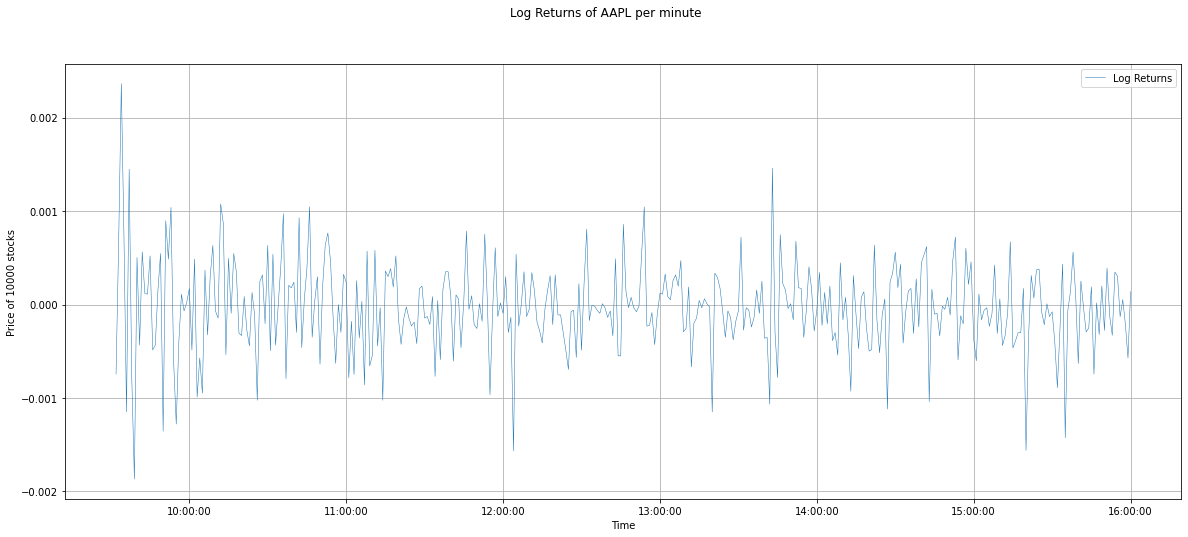

In [13]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df_prices_minute.Time, df_prices_minute.LogReturn, linewidth = 0.5, label = 'Log Returns')
plt.legend()
plt.grid()
# plt.tick_params(rotation=45)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
plt.xlabel('Time')
plt.ylabel('Price of 10000 stocks')
plt.suptitle('Log Returns of AAPL per minute')
plt.show()

In [15]:
# partition the price data from 10am to 3pm into 5 pieces, each contain prices in an hour
ts_dict = {}
start_time = dt.datetime(2012, 6, 21, 10, 0)
length = dt.timedelta(minutes=59)
for i in range(5):
    ts_dict[i] = df_prices_minute.loc[start_time:start_time+length]
    start_time  = start_time + dt.timedelta(hours = 1)
    

In [29]:
def random_shift(x, num_copies, cyclic = True, seed = 42):
    """ 
    pandas series x: input signal;
    int seed: random seed
    """
    random.seed(seed)
    df = pd.DataFrame(x)
    for i in range(num_copies):
        k = random.randrange(20)
        if cyclic:
            # cyclic shift
            y = np.roll(x,k)        
        else:
            # fill shifted null positions with standard white noise
            y = x.shift(periods = k)
            y = y.mask(y.isna(), np.random.normal(0, 1, size=len(y)))
        col_name = str(i+1) + ':' + str(k)
        df[col_name] = y
    return df.iloc[:,1:1+num_copies]

In [30]:
def random_noise(x, sigma = 0.1 ,seed = 42):
    random.seed(seed)
    noise = np.random.normal(0, sigma, x.shape)
    y = x + noise
    return y

In [31]:
def power_spectrum(x):
    return abs(x)**2

In [32]:
def bispectrum(X):
    # m: length of signal; n: number of copies
    m,n = X.shape
    output = np.zeros((n,m,m),dtype = 'complex_')
    for i in range(n):
        x = np.array(X)[:,i]
        mat1 = np.array([np.roll(x,k) for k in range(m)])
        mat2 = np.outer(x, np.conjugate(x))
        output[i] = mat1 * mat2
    return output

In [33]:
# standardise the prices and convert to list
data_dict = {}
for i in range(5):
    data_dict[i] = {}
    
n = 800 # number of copies of signals
sigma = 0.5
for i, signal_dict in data_dict.items():
    # standardised signals
    signal = (ts_dict[i].LogReturn - ts_dict[i].LogReturn.mean())/ ts_dict[i].LogReturn.std()
    signal_dict['original'] = signal
    # create shifted, noisy version of the signal
    signal_dict['shifted'] = random_shift(signal_dict['original'], n, cyclic = False)
    signal_dict['shifted+noise'] = random_noise(signal_dict['shifted'], sigma)
    signal_dict['DFT'] = pd.DataFrame(np.fft.fft(signal_dict['shifted+noise'], axis = 0), 
                                     columns = signal_dict['shifted+noise'].columns)
    signal_dict['mean'] = signal_dict['DFT'].iloc[0,:]/len(signal_dict['DFT'])
    signal_dict['power spec'] = signal_dict['DFT'].apply(power_spectrum, axis = 0)
    signal_dict['bispec'] = bispectrum(signal_dict['DFT'])
    

/Users/caribbeanbluetin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


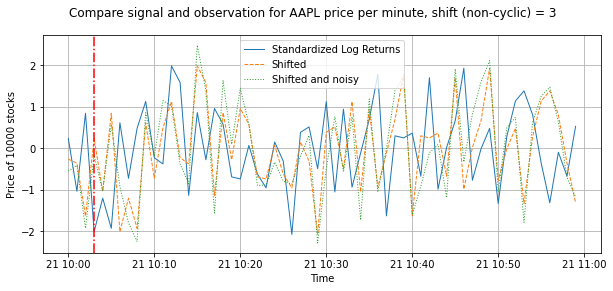

In [34]:
k = 0
col_name = data_dict[0]['shifted'].columns[k]
lag = int(col_name.split(':')[1])
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(data_dict[0]['original'], linewidth = 1, label = 'Standardized Log Returns')
ax.plot(data_dict[0]['shifted'].iloc[:,k], linewidth = 1, label = 'Shifted', linestyle = '--')
ax.plot(data_dict[0]['shifted+noise'].iloc[:,k], linewidth = 1, label = 'Shifted and noisy', linestyle = ':')
plt.axvline(data_dict[0]['original'].index[0] + dt.timedelta(minutes=lag), color = 'red', ls = '-.')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Price of 10000 stocks')
plt.suptitle('Compare signal and observation for AAPL price per minute, shift (non-cyclic) = '+str(lag))
plt.show()
fig.savefig('returns')

-0.008605938046738626
-0.033971378200964214
-0.02364777558323139
-0.023759099024901333
-0.042578090627442645


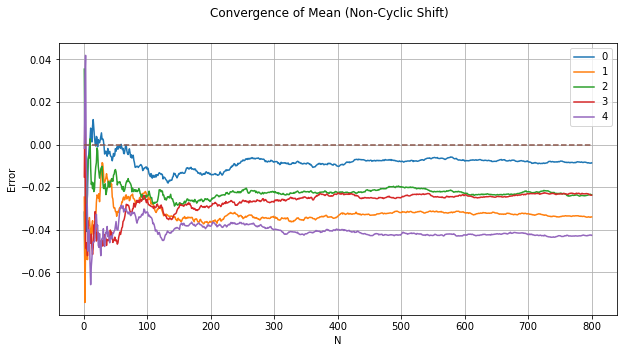

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
for m in range(5):
    mean = np.array(data_dict[m]['mean']).real
    x = range(1,len(mean)+1)
    average_mean = np.cumsum(mean)/x
    print(average_mean[-1])
    ax.plot(x,average_mean, label = m)
ax.plot(x, np.zeros(len(x)), linestyle = '--')
ax.set_xlabel('N')
ax.set_ylabel('Error')
plt.legend()
plt.grid()
plt.suptitle('Convergence of Mean (Non-Cyclic Shift)')
plt.show()
fig.savefig('mean')

2.473126197717847
3.633029361556571
3.0886649139325284
2.717558802312418
3.225278800004198


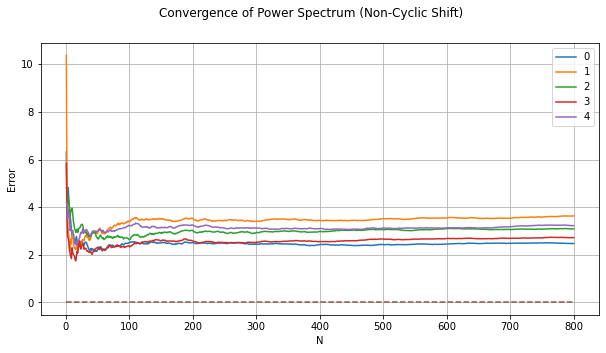

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
L = len(data_dict[m]['original'])
for m in range(5):
    Px = power_spectrum(np.fft.fft(data_dict[m]['original'])) 
    M2 = Px + sigma ** 2 * L
    x = range(1,n+1)
    average_PS = np.cumsum(data_dict[m]['power spec'], axis = 1)/np.array(x).reshape(1,n)
    loss = np.linalg.norm(average_PS - M2.reshape(L,1), axis = 0)/L
    ax.plot(x, loss, label = m)
    print(loss[-1])
ax.plot(x, np.zeros(len(x)), linestyle = '--')
ax.set_xlabel('N')
ax.set_ylabel('Error')
plt.legend()
plt.grid()
plt.suptitle('Convergence of Power Spectrum (Non-Cyclic Shift)')
plt.show()
fig.savefig('power_spec')

In [37]:
def make_A(L):
    A = np.zeros((L,L), dtype = 'complex_')
    A = A + np.eye(L) 
    A[0,:] += np.ones(L)
    A[:,0] += np.ones(L)
    return A

3.3511936980774517
4.141414383747873
3.7536049682023758
3.0719648314992973
4.104142810567434


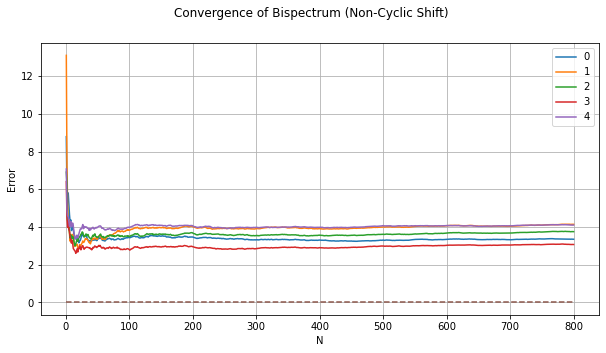

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
L = len(data_dict[m]['original'])
A = make_A(L)
for m in range(5):
    Bx = bispectrum(np.fft.fft(data_dict[m]['original'].to_frame(), axis = 0))
    mu = data_dict[m]['original'].mean()
    M3 = Bx + mu * (sigma ** 2) * (L ** 2) * A
    x = range(1,n+1)
    average_BS = np.cumsum(data_dict[m]['bispec'], axis = 0)/np.array(x).reshape(n,1,1)
    loss = np.linalg.norm(average_BS - M3.reshape(1,L,L), axis = (1,2))/(L*L)
    ax.plot(x, loss, label = m)
    print(loss[-1])
ax.plot(x, np.zeros(len(x)), linestyle = '--')
ax.set_xlabel('N')
ax.set_ylabel('Error')
plt.legend()
plt.grid()
plt.suptitle('Convergence of Bispectrum (Non-Cyclic Shift)')
plt.show()
fig.savefig('bispec')

In [27]:
for m in range(5):
    print(data_dict[m]['shifted+noise'].mean(axis = 0).mean())
    print(data_dict[m]['shifted+noise'].std(axis = 0).mean())

-3.5258048842553015e-05
1.127235695401254
-0.014455211564671541
1.1216344650390517
0.012216664310446297
1.126273455887559
0.0002683581783759754
1.1232756294385755
-0.025981191272406674
1.1141303727381477


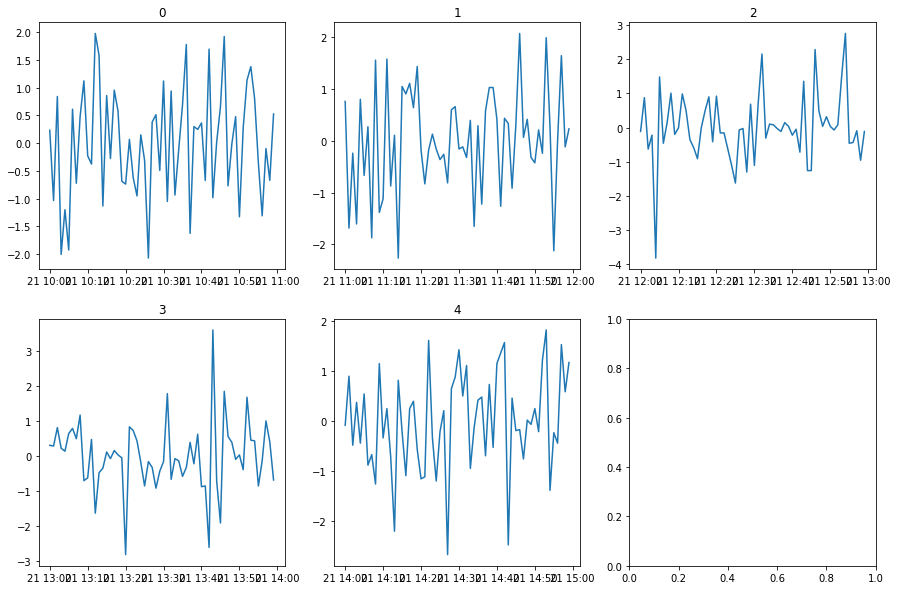

In [28]:
fig, ax = plt.subplots(2,3, figsize = (15,10))
for m in range(5):
    ax.flatten()[m].plot(data_dict[m]['original'])
    ax.flatten()[m].set_title(m)

In [24]:
data_dict[0]['power spec']

# are power spetrum invariant?
for m in range(5):
    a = 0
    for i in range(n):
        a += np.linalg.norm(np.abs(data_dict[m]['power spec'].iloc[:,0] - data_dict[m]['power spec'].iloc[:,i]))
    print('average difference = ', abs(a)/n)

average difference =  698.5733466831774
average difference =  651.0376491239873
average difference =  767.2446794322528
average difference =  751.4230415898586
average difference =  622.4217306101777


In [58]:
x = np.linspace(0,2*np.pi,200)
x = np.sin(x)

In [87]:
y = np.arange(9).reshape(3,3)
def f(x):
    return abs(x)**2
np.apply_along_axis(f, 0, y)

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [88]:
np.zeros(3)

array([0., 0., 0.])

ERROR! Session/line number was not unique in database. History logging moved to new session 434


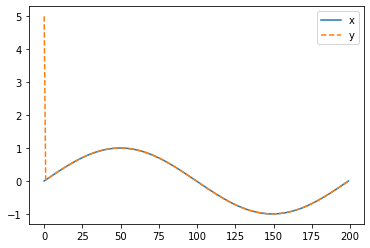

In [64]:
fig, ax = plt.subplots(1,1)
ax.plot(x, label = 'x')
ax.plot(y, linestyle = '--', label = 'y')
plt.legend()

In [ ]:
datetime.date(2023, 3,31) - datetime.date(2022,20,8)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/caribbeanbluetin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jd/527mtz4572vc3n40k0xxf1vm0000gr/T/ipykernel_51972/952120453.py", line 1, in <module>
    datetime.date(2023, 3,31) - datetime.date(2022,20,8)
NameError: name 'datetime' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/caribbeanbluetin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/caribbeanbluetin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/p

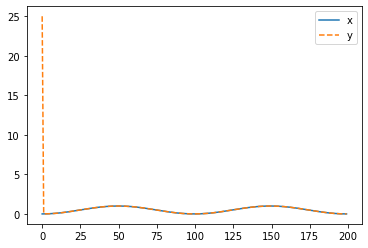

In [61]:
fig, ax = plt.subplots(1,1)
ax.plot(power_spectrum(pd.Series(x)), label = 'x')
ax.plot(power_spectrum(pd.Series(y)), linestyle = '--', label = 'y')
plt.legend()

In [72]:
#rubish
import pymanopt
import pymanopt.manifolds
import pymanopt.optimizers

from pymanopt.optimizers.trust_regions import TrustRegions

myopt = TrustRegions(miniter=3,
        kappa=0.1,
        theta=1.0,
        rho_prime=0.1,
        use_rand=False,
        rho_regularization=1e3,
        #optimizer variables
        max_time = 1000,
        max_iterations = 1000,
        min_gradient_norm = 1e-6,
        min_step_size = 1e-10,
        max_cost_evaluations = 5000,
        verbosity = 2,
        log_verbosity = 0
        )


ERROR! Session/line number was not unique in database. History logging moved to new session 430


In [26]:
# are bispetrum invariant?
for m in range(5):
    a = 0
    for i in range(n):
        a += np.linalg.norm(np.abs(data_dict[m]['bispec'][0] - data_dict[m]['bispec'][i]))
    print('average difference = ', abs(a)/n)

average difference =  50107.37164872599
average difference =  43713.522321246885
average difference =  51695.20250208989
average difference =  57096.505643568526
average difference =  51515.07911997744


In [27]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X